In [1]:
# Ensure we are using the latest version to avoid problems
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.5 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 

In [13]:
from fastai.vision.all import *
path = Path("/kaggle/input/bsas-city-landmarks-5")

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(250, min_scale=0.5),
    batch_tfms=aug_transforms()
).dataloaders(path, bs=32)

In [27]:
import timm
learn = vision_learner(dls, "convnext_base.fb_in22k", metrics=error_rate)

0.0012022644514217973

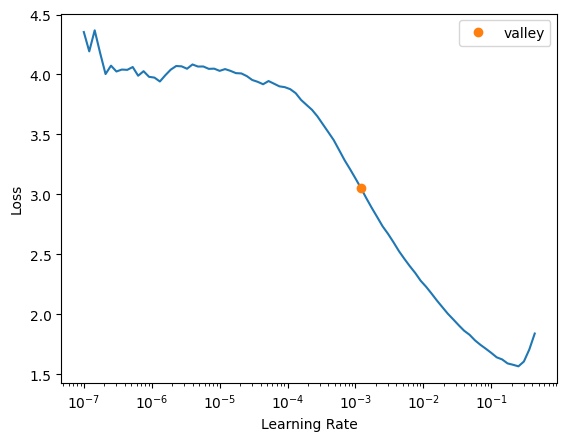

In [28]:
lr_suggested = learn.lr_find()
lr_valley = lr_suggested.valley
lr_valley

In [29]:
learn.fine_tune(7, lr_valley)

epoch,train_loss,valid_loss,error_rate,time
0,1.282169,0.094034,0.026144,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.138032,0.082755,0.019608,01:47
1,0.121247,0.094439,0.022876,01:46
2,0.069659,0.080478,0.019608,01:46
3,0.044260,0.085585,0.019608,01:46
4,0.033720,0.090918,0.022876,01:46
5,0.035141,0.089388,0.022876,01:46
6,0.032530,0.087143,0.019608,01:46


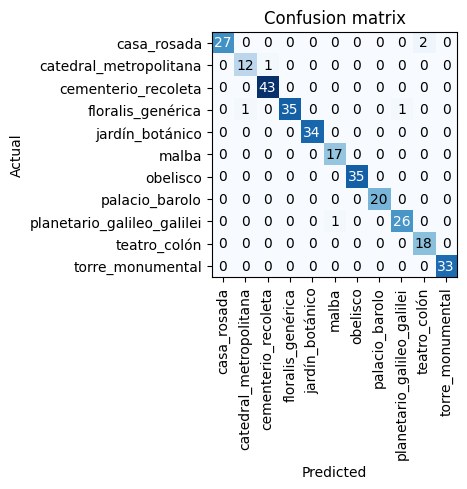

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [38]:
learn.export("model.pkl")

In [33]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

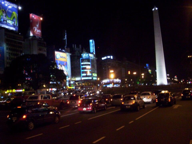

In [36]:
img_data = uploader.value[0]['content'].tobytes()
img = PILImage.create(img_data)
img.to_thumb(192)
# https://commons.wikimedia.org/wiki/File:Obelisco_de_Buenos_Aires_de_noche.jpg
# Banfield, Public domain, via Wikimedia Commons

In [37]:
# Predict
predicted_class, predicted_idx, probs = learn.predict(img)

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Print the predicted class index
print(f"Predicted Class Index: {predicted_idx}")

# Print the probabilities for each category
# First, get the order from the vocab object (inside the dataloaders)
categories = learn.dls.vocab
categories
print("Class Probabilities:")
for i, prob in enumerate(probs):
    print(f"{categories[i]}: {prob:.4f} ({prob.item() * 100:.2f}%)")

Predicted Class: obelisco
Predicted Class Index: 6
Class Probabilities:
casa_rosada: 0.0000 (0.00%)
catedral_metropolitana: 0.0000 (0.00%)
cementerio_recoleta: 0.0000 (0.00%)
floralis_genérica: 0.0000 (0.00%)
jardín_botánico: 0.0000 (0.00%)
malba: 0.0000 (0.00%)
obelisco: 1.0000 (100.00%)
palacio_barolo: 0.0000 (0.00%)
planetario_galileo_galilei: 0.0000 (0.00%)
teatro_colón: 0.0000 (0.00%)
torre_monumental: 0.0000 (0.00%)
